In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

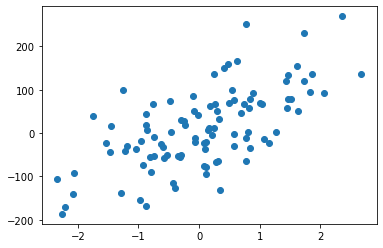

In [128]:
Samples = 100
features =  2
x , y = make_regression(n_features=features,n_samples=Samples,noise=10)
plt.scatter(x[:,0],y)


In [129]:
y.resize(y.shape[0],1)
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


In [131]:
X = np.hstack([x,np.ones([Samples,1])])
theta = np.random.rand(features+1,1)
X.shape

(100, 3)

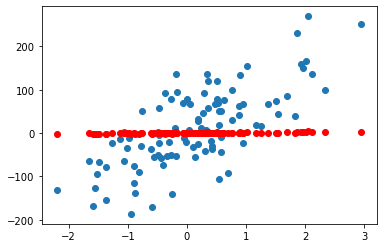

In [165]:
#defining our model
def model(X,theta):
  return X.dot(theta) 
model(X,theta)
plt.scatter(X[:,1],y)
plt.scatter(X[:,1],model(X,theta),c="r")

In [133]:
#cost function
def costFunction(x,y,theta):
    y_p =   model(x,theta) - y
    m = len(y_p)
    return 1/2*m*(np.sum(y_p)**2)

# **Gradient descent **


In [134]:
def grad(x,y,theta):
    m = len(y)
    return (1/m) * (x.T.dot(model(X,theta) - y))


In [135]:
print(grad(X,y,theta))
def gradient_descent(x,y,theta, learning_rate, numberOfIterations):
    cost_array = np.zeros(numberOfIterations)
    for i in range(0,numberOfIterations):
        theta = theta - learning_rate*grad(x,y,theta)
        cost_array[i]= costFunction(x,y,theta)
    return theta ,cost_array

[[-63.00230823]
 [-66.64229874]
 [-11.8535994 ]]


# *** Machine Learning ***


array([[50.89040141],
       [58.21780139],
       [ 2.9674583 ]])

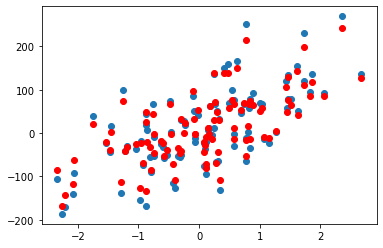

In [170]:
nOfIterations = 2000
theta_final, cost = gradient_descent(X,y,theta,0.001,nOfIterations)
predcs = model(X,theta_final)
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],predcs,c="r",marker="o")
theta_final

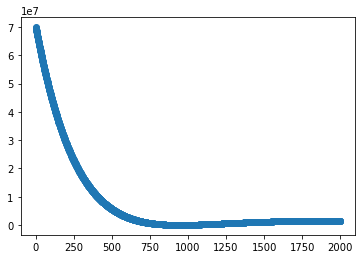

In [171]:
plt.scatter(range(nOfIterations),cost)

In [172]:
## R**2
def coef(y,predictions):
    u = ((y-predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return  1 -u/v
coef(y,predcs)

0.9683589050924847